<a href="https://colab.research.google.com/github/okweipeng/Integrative-Data-Analysis-and-Visualization-on-NYPD-Data/blob/main/Data_Analysis_Visualization_using_Open_Data_Sources_(NYPD_NYC_Crime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CST 3512 Project**
---

CSV File Used: NYPD_Arrest_Data__Year_to_Date_.csv

Data From - January, 2023

Data Valid Up To - September, 2023
---

Datasets used has that been filtered which includes: offense records/description, ages, day of arrest, and which borough arrested at.

Heatmap is based on offense records/description, ages, day of arrest, and which borough arrested at.

In [ ]:
# Importing the usuals
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [ ]:
# Loading in the CSV file
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

In [ ]:
# Checking for null values
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
# Drop all null values
df = df.dropna()
df.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()
# df_cleaned = df.drop_duplicates()

0

In [ ]:
df.head()

ARREST_KEY ARREST_DATE  PD_CD                      PD_DESC  KY_CD  \
0   261209118  01/01/2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   
1   262984267  02/03/2023    515  CONTROLLED SUBSTANCE,SALE 3  117.0   
2   263664549  02/15/2023    105            STRANGULATION 1ST  106.0   
3   261345231  01/04/2023    105            STRANGULATION 1ST  106.0   
4   263536618  02/13/2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   

         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
0   FELONY ASSAULT  PL 1200501          F           K               77   
1  DANGEROUS DRUGS  PL 2203901          F           K               73   
2   FELONY ASSAULT  PL 1211200          F           K               62   
3   FELONY ASSAULT  PL 1211200          F           M               32   
4   FELONY ASSAULT  PL 12005WX          F           K               71   

   JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD  \
0                  0     45-64        F     BLACK      999335      186085   
1                  0     25-44        M     BLACK     1009318      178259   
2                  0     25-44        M     WHITE      982272      158771   
3                  0     25-44        M     BLACK      999899      238684   
4                  0     25-44        M     BLACK     1001437      183080   

    Latitude  Longitude      New Georeferenced Column  Count  
0  40.677426 -73.945615  POINT (-73.945615 40.677426)      1  
1  40.655923 -73.909650   POINT (-73.90965 40.655923)      1  
2  40.602468 -74.007120   POINT (-74.00712 40.602468)      1  
3  40.821797 -73.943457  POINT (-73.943457 40.821797)      1  
4  40.669175 -73.938042  POINT (-73.938042 40.669175)      1

## **Creating Heatmap with the Imports of Seaborn**


Here the output will tell us the value of each set of age group that has comitted the offense/criminal activty within the five boroughs and its total.

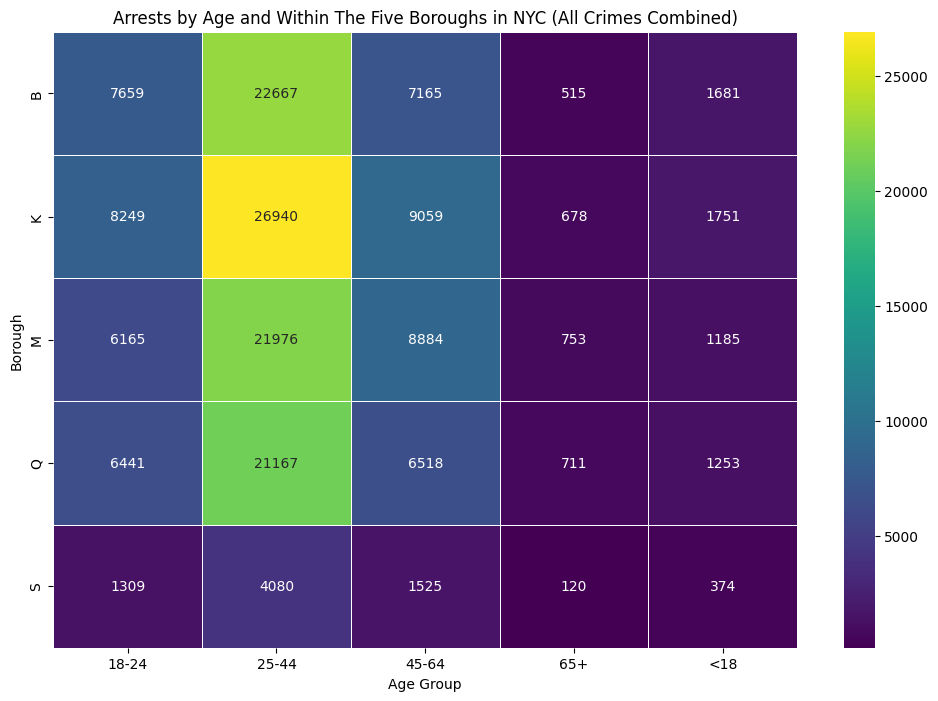

In [ ]:
# Add a count column for aggregating the data (act as its incrementing by one based on the crimes + borough based)
df['Count'] = 1

# Grouping the df by 'ARREST_BORO' and 'AGE_GROUP' and sums up the 'Count' values for each group.
heatmap_data = df.groupby(['ARREST_BORO', 'AGE_GROUP']).agg({'Count': 'sum'}).reset_index().pivot_table(index='ARREST_BORO', columns='AGE_GROUP', values='Count')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="viridis", linewidths=.5)
plt.title('Arrests by Age and Within The Five Boroughs in NYC (All Crimes Combined)')
plt.xlabel('Age Group')
plt.ylabel('Borough')

plt.show()

**Summary**

Here I created a heat map with the imports of seaborn (sns). With the unfiltered datasets used, we can conclude that ages ranging from 25 to 44 creates a large portion of crimes committed than any other age group.

**Heatmap 1 - Unfiltered Crime Data - Imports of Folium**

In [ ]:
# Specified longtitude and latitude to map each borough
borough_coordinates = {'K': (40.650002, -73.949997),  # Brooklyn (Kings)
                       'S': (40.579021, -74.151535),  # Staten Island
                       'Q': (40.7282, -73.7949),      # Queens
                       'M': (40.7831, -73.9712),      # Manhattan
                       'B': (40.8448, -73.865433)}    # Bronx

# Map borough codes to their respective coordinates
df['Coordinates'] = df['ARREST_BORO'].map(borough_coordinates)

# Drop rows with missing coordinates
df = df.dropna(subset=['Coordinates'])

# Group data by borough and offense description, then calculate the count
crime_counts = df.groupby(['ARREST_BORO', 'OFNS_DESC']).size().reset_index(name='CrimeCount')

# Create a Folium Map centered around New York City
m = folium.Map(location=(40.712776, -74.005974), zoom_start=10, width='80%', height='80%')

# Add markers for each borough
for borough, coordinates in borough_coordinates.items():
    folium.Marker(location=coordinates, popup=borough).add_to(m)

# Extract individual crime coordinates and convert them to a list
crime_coordinates = df['Coordinates'].tolist()

# Displays the coded region of the most committed crime areas
HeatMap(crime_coordinates, radius=90).add_to(m)

# Display the map
m

Creating a heatmap with the imports of folium with a visual view of the map using OpenStreetMap; included marking to each corresponding boroughs

Again, did not filter out any data

**Summary**

Created another heat map with the imports of folium to have a visual view of including an OpenStreetMap. Based on the visual of the following heat map it tell us that the borough; Brooklyn, between Manhattan and Bronx, also between the Bronx and the Queens it seems to be where most crimes take place based on the color where it has darkened

**Heatmap 2 - Filtered Crime Categories - Imports of Folium**

Here, i created a another heatmap but this time i filter out the offense/charges to my preferenece to compare if there are any noticed difference between unfiltered vs filtered offenses.

Offenses Include - DANGEROUS WEAPONS, RAPE, ROBBERY, FELONY ASSAULT, DANGEROUS DRUGS & CRIMINAL TRESPASS

In [ ]:
# Define the desired criminal offenses/charges
criminal_offenses = ['DANGEROUS WEAPONS', 'FRAUDS', 'ROBBERY', 'FELONY ASSAULT', 'CRIMINAL TRESPASS']

# Filter data for criminal offenses and create a copy
df_criminal = df[df['OFNS_DESC'].isin(criminal_offenses)].copy()

# Specified longtitude and latitude to map each borough
borough_coordinates =  {'K': (40.650002, -73.949997), # Brooklyn (Kings)
                       'S': (40.579021, -74.151535),  # Staten Island
                       'Q': (40.7282, -73.7949),      # Queens
                       'M': (40.7831, -73.9712),      # Manhattan
                       'B': (40.8448, -73.865433)}    # Bronx

# Use .loc to set 'Coordinates' in the original DataFrame
df_criminal.loc[:, 'Coordinates'] = df_criminal['ARREST_BORO'].map(borough_coordinates)

# Drop rows with missing coordinates
df_criminal = df_criminal.dropna(subset=['Coordinates'])

# Create a Folium Map centered around New York City
m = folium.Map(location=(40.712776, -74.005974), zoom_start=10, width='80%', height='80%')

# Add markers for each borough
for borough, coordinates in borough_coordinates.items():
    folium.Marker(location=coordinates, popup=borough).add_to(m)

# Extract individual crime coordinates and convert them to a list
crime_coordinates = df_criminal['Coordinates'].tolist()

# Increase the radius for a larger heatmap
HeatMap(crime_coordinates, radius=90).add_to(m)

# Display the map
m

**Summary**

This time in creation of the heat map I have filtered out the criminal offenses to five which includes: Dangerous Weapon In Position, Fraud Activity, Robbery, Felony Assault, and Criminal Trespassing

The results of the output still seems to be somewhat the same where the borough: Brooklyn still has the highest crime rate overall


**Comparison: Filtered vs Unfiltered Heat Maps Summary**

In having both the unfiltered and filtered criminal offenses heat map side by side and I noticed that between Manhattan and bronx and also between Bronx and the Queens the color seemed to have lightened compared to the unfiltered heat map.

(And that’s because it’s all the total offenses is being compared to five that I have filtered out from the datasets column)

**Bar Plot**

Here, i created a bar plot - filter out the offenses/charges

Creating a bar plot allows us to see what age group has committed the offenses the most

In addition to what visual see what activty that committed to violates the law the most....

Offenses Include - DANGEROUS WEAPONS, RAPE, ROBBERY, FELONY ASSAULT, DANGEROUS DRUGS & CRIMINAL TRESPASS

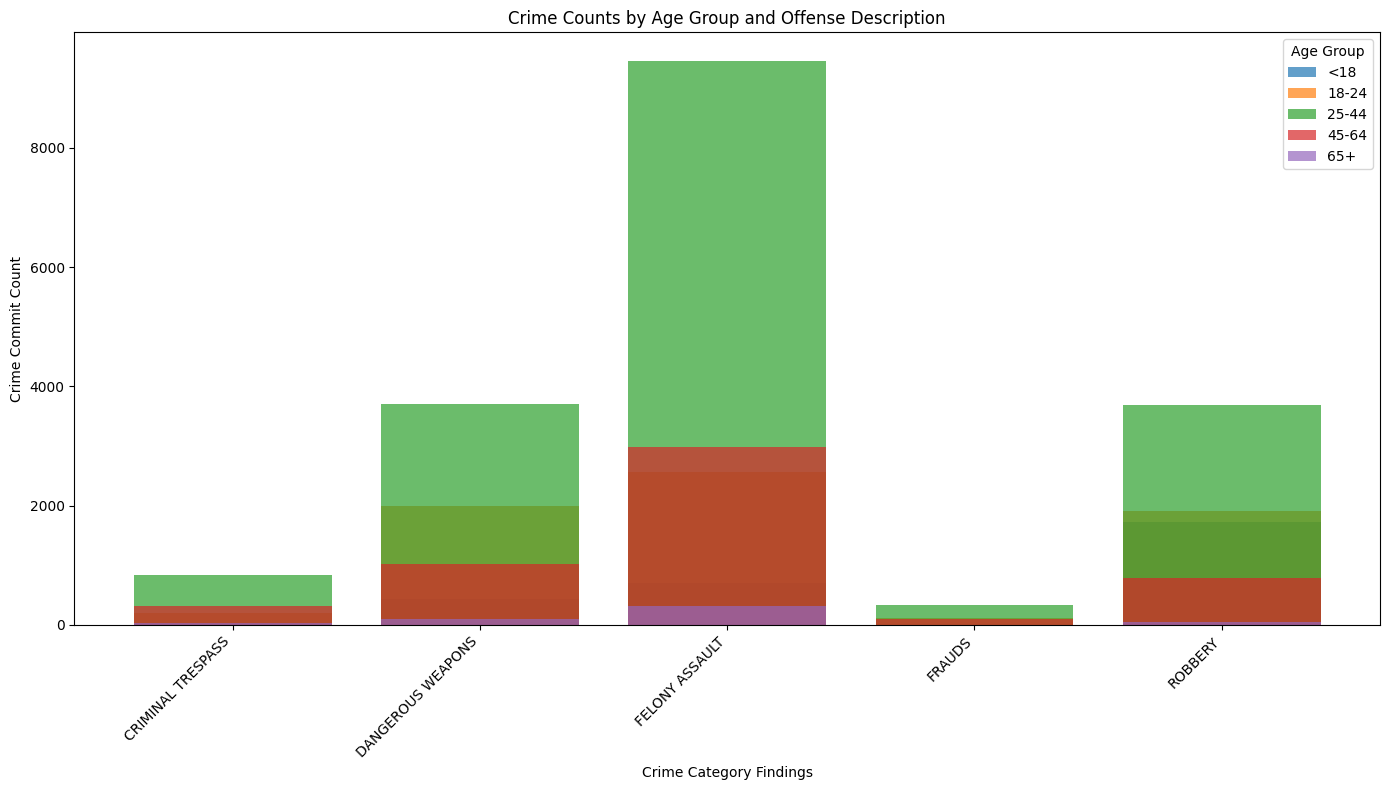

In [ ]:
# Define the desired crimes and age groups
committed_crimes = ['DANGEROUS WEAPONS', 'FRAUDS', 'ROBBERY', 'FELONY ASSAULT', 'CRIMINAL TRESPASS']
age_groups = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter the data for the desired crimes and age groups
filtered_data = df[(df['OFNS_DESC'].isin(committed_crimes)) & (df['AGE_GROUP'].isin(age_groups))]

# Group data by age group and offense description, then calculate the count
crime_counts = filtered_data.groupby(['AGE_GROUP', 'OFNS_DESC']).size().reset_index(name='CrimeCount')

# Create a bar plot
plt.figure(figsize=(14, 8))
for age_group in age_groups:
    subset = crime_counts[crime_counts['AGE_GROUP'] == age_group]
    plt.bar(subset['OFNS_DESC'], subset['CrimeCount'], label=age_group, alpha=0.7)

plt.xlabel('Crime Category Findings')
plt.ylabel('Crime Commit Count')
plt.title('Crime Counts by Age Group and Offense Description')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Summary**

In creation of the bar plot, the results tells us that ages from 25 to 44 makes up a large portion of each categorized crime or the cause of the violation of the law.

In addition, it seems that - felony assault ~ from ages 25 to 44 makes up a larger percentage of crimes compared to other age groups within that category.

It seems that there’s about an estimate of 8000 counts total that has to do with felony assault which i thought it was a large number. And that’s just within 9 months of 2023

**Time Series Plot**

Created a time series plot - for the offeneses/criminal description provided the CSV in regards to the NYPD arrest info

With the visuals of the time series plot it allows me to visually see the trend that it is happening from time to time (in this case month to month varies)

The time series plot allows visual on viewing how each offense/criminal activty may be going and predict for future months when possible.

Filtered offenses include: DANGEROUS WEAPONS, RAPE, ROBBERY, FELONY ASSAULT, DANGEROUS DRUGS & CRIMINAL TRESPASS

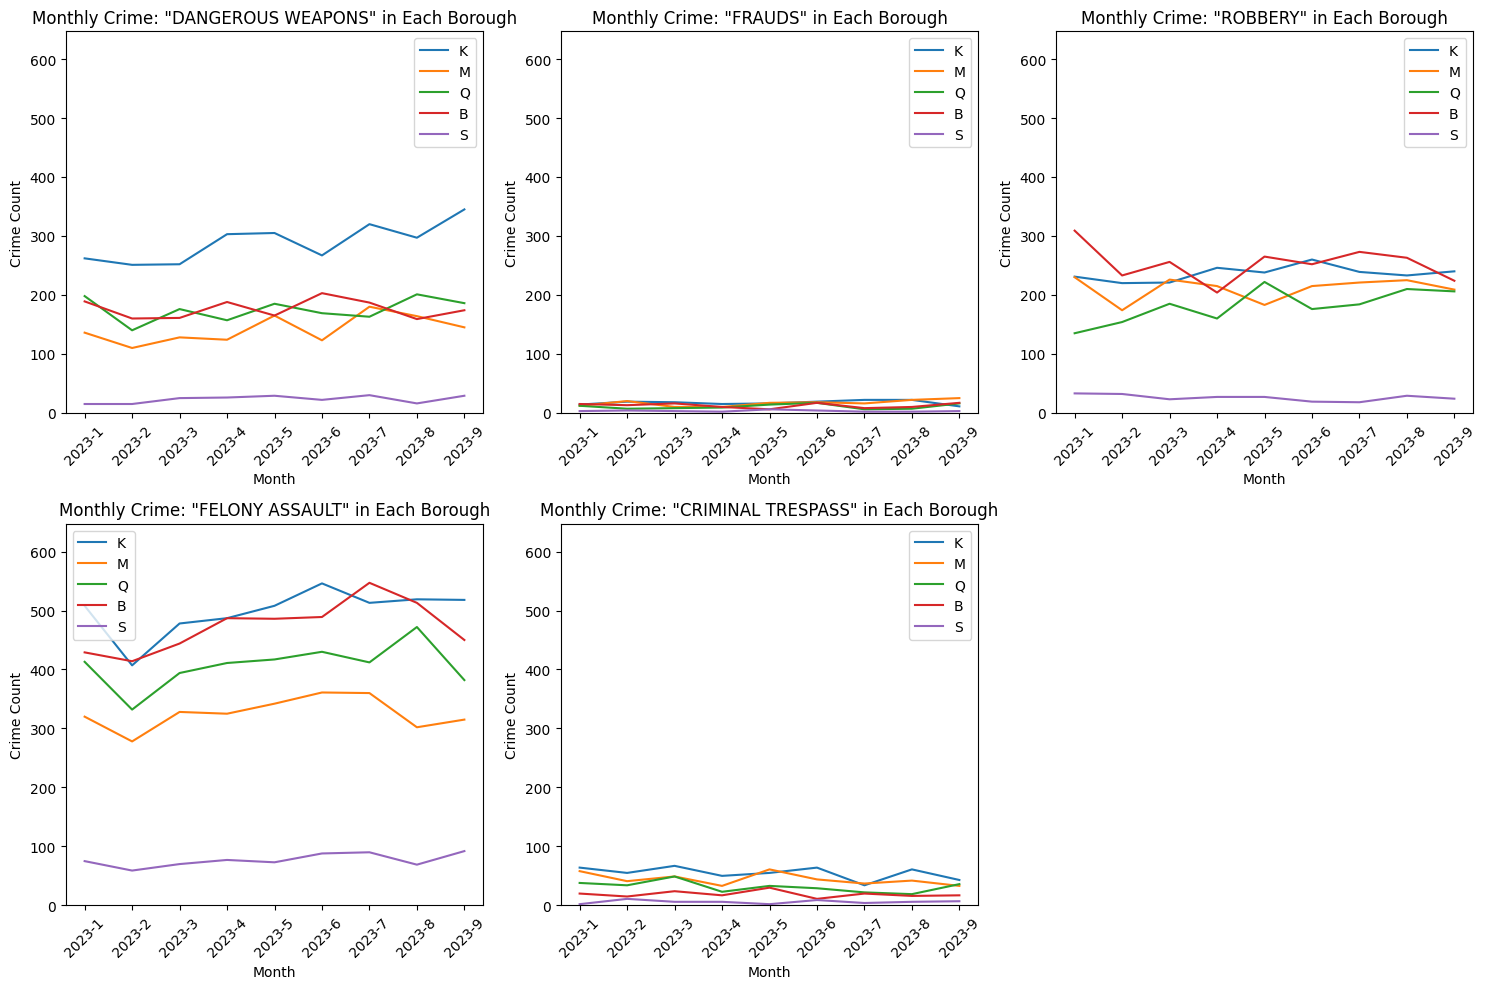

In [ ]:
# Convert 'ARREST_DATE' to datetime format and extract month and year
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['Month'] = df['ARREST_DATE'].dt.month
df['Year'] = df['ARREST_DATE'].dt.year

# Specify the offenses of interest
offenses_of_interest = ['DANGEROUS WEAPONS', 'FRAUDS', 'ROBBERY', 'FELONY ASSAULT', 'CRIMINAL TRESPASS']

# Calculate maximum crime count across all boroughs and offenses
max_crime_count = df[df['OFNS_DESC'].isin(offenses_of_interest)] \
    .groupby(['OFNS_DESC', 'ARREST_BORO', 'Year', 'Month']) \
    .size().max()

# Create a time series line plot for each offense
plt.figure(figsize=(15, 10))

# In a loop on incrementing on offense of interest
for index, offense in enumerate(offenses_of_interest, start=1):
    plt.subplot(2, 3, index)

    # Filter and group data for the specific offense
    monthly_crimes = df[df['OFNS_DESC'] == offense] \
        .groupby(['ARREST_BORO', 'Year', 'Month']) \
        .size().reset_index(name='CrimeCount')

    # Plot time series for each borough
    for borough in df['ARREST_BORO'].unique():
        borough_crimes = monthly_crimes[monthly_crimes['ARREST_BORO'] == borough]
        plt.plot(
            borough_crimes['Year'].astype(str) + '-' + borough_crimes['Month'].astype(str),
            borough_crimes['CrimeCount'],
            label=borough
        )

    # Set titles and labels
    plt.title(f'Monthly Crime: "{offense}" in Each Borough')
    plt.xlabel('Month')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.xticks(rotation=45)

    # Set a common y-axis range
    plt.ylim(0, max_crime_count + 100)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Summary**

By examining the time series plot here, we can visually see the trend for **"Dangerous Weapons In Position"** it seems to be increasing as it reaches towards the end of September of 2023 and on foward. (prediction)

As for other categorized offense, it seems to be decreasing as each month passes by depending on which borough you're looking at. While it does seem to be decreasing in most categorized crimes that is focused here, in the examination of **fraudulent activity** and **criminal trespassing** it seems to be on the stable side within the five boroughs in NYC.

**Results/Findings:**

In my findings ~ with unfiltered datasets (ARREST_DATE, OFNS_DECS, AGE_GROUP, ARREST_BORO) I found out that within the spread-out age group, the ages from **25-44** has commit the most criminal activity in the borough of **Brooklyn (Kings)**.

In the creation of a heat-map with the imports of folium (filtered vs unfiltered), the results seen to be the same no matter what. In addition, the conclusion that can be drawn by looking at the visuals of the OpenStreetMap we can see that in the borough of **Staten Island**, it seems that there are fewer crime activities involved.

Creating a bar plot combining both the age groups and criminal activity of preference, I wanted to see what the most committed crimes are among the ages. My findings were ages 25 through 44 played a huge chunk of assaults, robberies, and dangerous weapons in position. With the time series plot, we can visually see the trend of the crimes that I chose that are committed through each month from the start of **January to September of 2023**. In conclusion, by looking at each individual plot **Brooklyn (County: Kings)** seems to be on top and has a slight increase towards the end of September in overall view.

In addition, by looking at the time series plot we can say that the borough of **Staten Island** has the lowest rate of crime when compared to the other four boroughs.

**Conclusion**


In conclusion, my findings for the year 2023 data thats up until September, filtered or unfiltered datasets we can say that **(Kings - Brooklyn)** has the most crimes where it is committed. In the findings of what was implement within the five boroughs, we still can say that **Brooklyn (County: Kings)** is where most of the criminal activity has been committed/done. (arrested factors)

Having data/records being stored allows the recreation, exploration, and to visually understand what is happening based on combining multiple datasets in interst to come up with a conclusioning draw/data analysis.

In addition to this, in my overall findings it seems that the borough Staten Island seems to have the most minimum and where Brooklyn has the maximum crimes has committed. (may be based on the populations)